# Análise Exploratória de Homicídios nos Estados Unidos (1980-2014)

Este projeto realiza uma investigação detalhada sobre as dinâmicas de crimes violentos, perfis de vítimas, métodos utilizados e distribuições geográficas ao longo de três décadas.

---

### Fonte dos Dados
* **Link Original:** [Acessar US Crime Dataset no Kaggle](https://www.kaggle.com/datasets/mrayushagrawal/us-crime-dataset)

- **Pacotes python**

In [1]:
import warnings

# Configuração para ignorar todos os warnings
warnings.filterwarnings('ignore')

import zipfile
import pandas as pd

# Configurações para exibição
# 'display.max_columns': Define para None para que o Pandas não omita colunas.
pd.set_option('display.max_columns', None)

# 'display.max_rows': Define o máximo de linhas a serem exibidas antes de truncar.
pd.set_option('display.max_rows', 30)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway


- **Carregando o Dataset**

In [2]:
FILE_ZIP = './US_Crime_DataSet.zip'
DATASET = 'US_Crime_DataSet.csv'

with zipfile.ZipFile(FILE_ZIP) as zf:
    with zf.open(DATASET) as file:
        df = pd.read_csv(file)


- **Estrutura dos dados**

In [3]:
print(f'Total de linhas {df.shape[0]}')
print(f'Total de colunas {df.shape[1]}')

display(df.head())
display(df.isnull().sum())
display(df.dtypes)

Total de linhas 638454
Total de colunas 24


,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,Crime Solved,Victim Sex,Victim Age,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

Record ID                 int64
Agency Code              object
Agency Name              object
Agency Type              object
City                     object
State                    object
Year                      int64
Month                    object
Incident                  int64
Crime Type               object
Crime Solved             object
Victim Sex               object
Victim Age                int64
Victim Race              object
Victim Ethnicity         object
Perpetrator Sex          object
Perpetrator Age          object
Perpetrator Race         object
Perpetrator Ethnicity    object
Relationship             object
Weapon                   object
Victim Count              int64
Perpetrator Count         int64
Record Source            object
dtype: object

- **Renomeando as colunas

In [4]:

col = {
    'Record ID': 'ID_Registro',
    'Agency Code': 'Codigo_Agencia',
    'Agency Name': 'Nome_Agencia',
    'Agency Type': 'Tipo_Agencia',
    'City': 'Cidade',
    'State': 'Estado',
    'Year': 'Ano',
    'Month': 'Mes',
    'Incident': 'Incidente',
    'Crime Type': 'Tipo_Crime',
    'Crime Solved': 'Crime_Resolvido',
    'Victim Sex': 'Vitima_Sexo',
    'Victim Age': 'Vitima_Idade',
    'Victim Race': 'Vitima_Raca',
    'Victim Ethnicity': 'Vitima_Etnia',
    'Perpetrator Sex': 'Perpetrador_Sexo',
    'Perpetrator Age': 'Perpetrador_Idade',
    'Perpetrator Race': 'Perpetrador_Raca',
    'Perpetrator Ethnicity': 'Perpetrador_Etnia',
    'Relationship': 'Relacionamento',
    'Weapon': 'Arma',
    'Victim Count': 'Contagem_Vitimas',
    'Perpetrator Count': 'Contagem_Perpetradores',
    'Record Source': 'Fonte_Registro'
}

df = df.rename(columns=col)

print("Novas colunas do DataFrame:")
print(df.columns)

Novas colunas do DataFrame:
Index(['ID_Registro', 'Codigo_Agencia', 'Nome_Agencia', 'Tipo_Agencia',
       'Cidade', 'Estado', 'Ano', 'Mes', 'Incidente', 'Tipo_Crime',
       'Crime_Resolvido', 'Vitima_Sexo', 'Vitima_Idade', 'Vitima_Raca',
       'Vitima_Etnia', 'Perpetrador_Sexo', 'Perpetrador_Idade',
       'Perpetrador_Raca', 'Perpetrador_Etnia', 'Relacionamento', 'Arma',
       'Contagem_Vitimas', 'Contagem_Perpetradores', 'Fonte_Registro'],
      dtype='object')


- **Limpando valores nulos**

In [5]:
df.dropna(inplace=True)

df.head()

,ID_Registro,Codigo_Agencia,Nome_Agencia,Tipo_Agencia,Cidade,Estado,Ano,Mes,Incidente,Tipo_Crime,Crime_Resolvido,Vitima_Sexo,Vitima_Idade,Vitima_Raca,Vitima_Etnia,Perpetrador_Sexo,Perpetrador_Idade,Perpetrador_Raca,Perpetrador_Etnia,Relacionamento,Arma,Contagem_Vitimas,Contagem_Perpetradores,Fonte_Registro
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,Yes,Male,14,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,Yes,Male,43,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,No,Female,30,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


# Visualização dos dados

### ***Armas ultilizadas*** ###

In [6]:
pct_arm = df['Arma'].value_counts(normalize=True) * 100
pct_arm

Arma
Handgun          49.726997
Knife            14.873742
Blunt Object     10.546884
Firearm           7.358400
Unknown           5.198808
Shotgun           4.811936
Rifle             3.656802
Strangulation     1.270256
Fire              0.966867
Suffocation       0.621501
Gun               0.345522
Drugs             0.248726
Drowning          0.188581
Explosives        0.084109
Poison            0.071109
Fall              0.029759
Name: proportion, dtype: float64

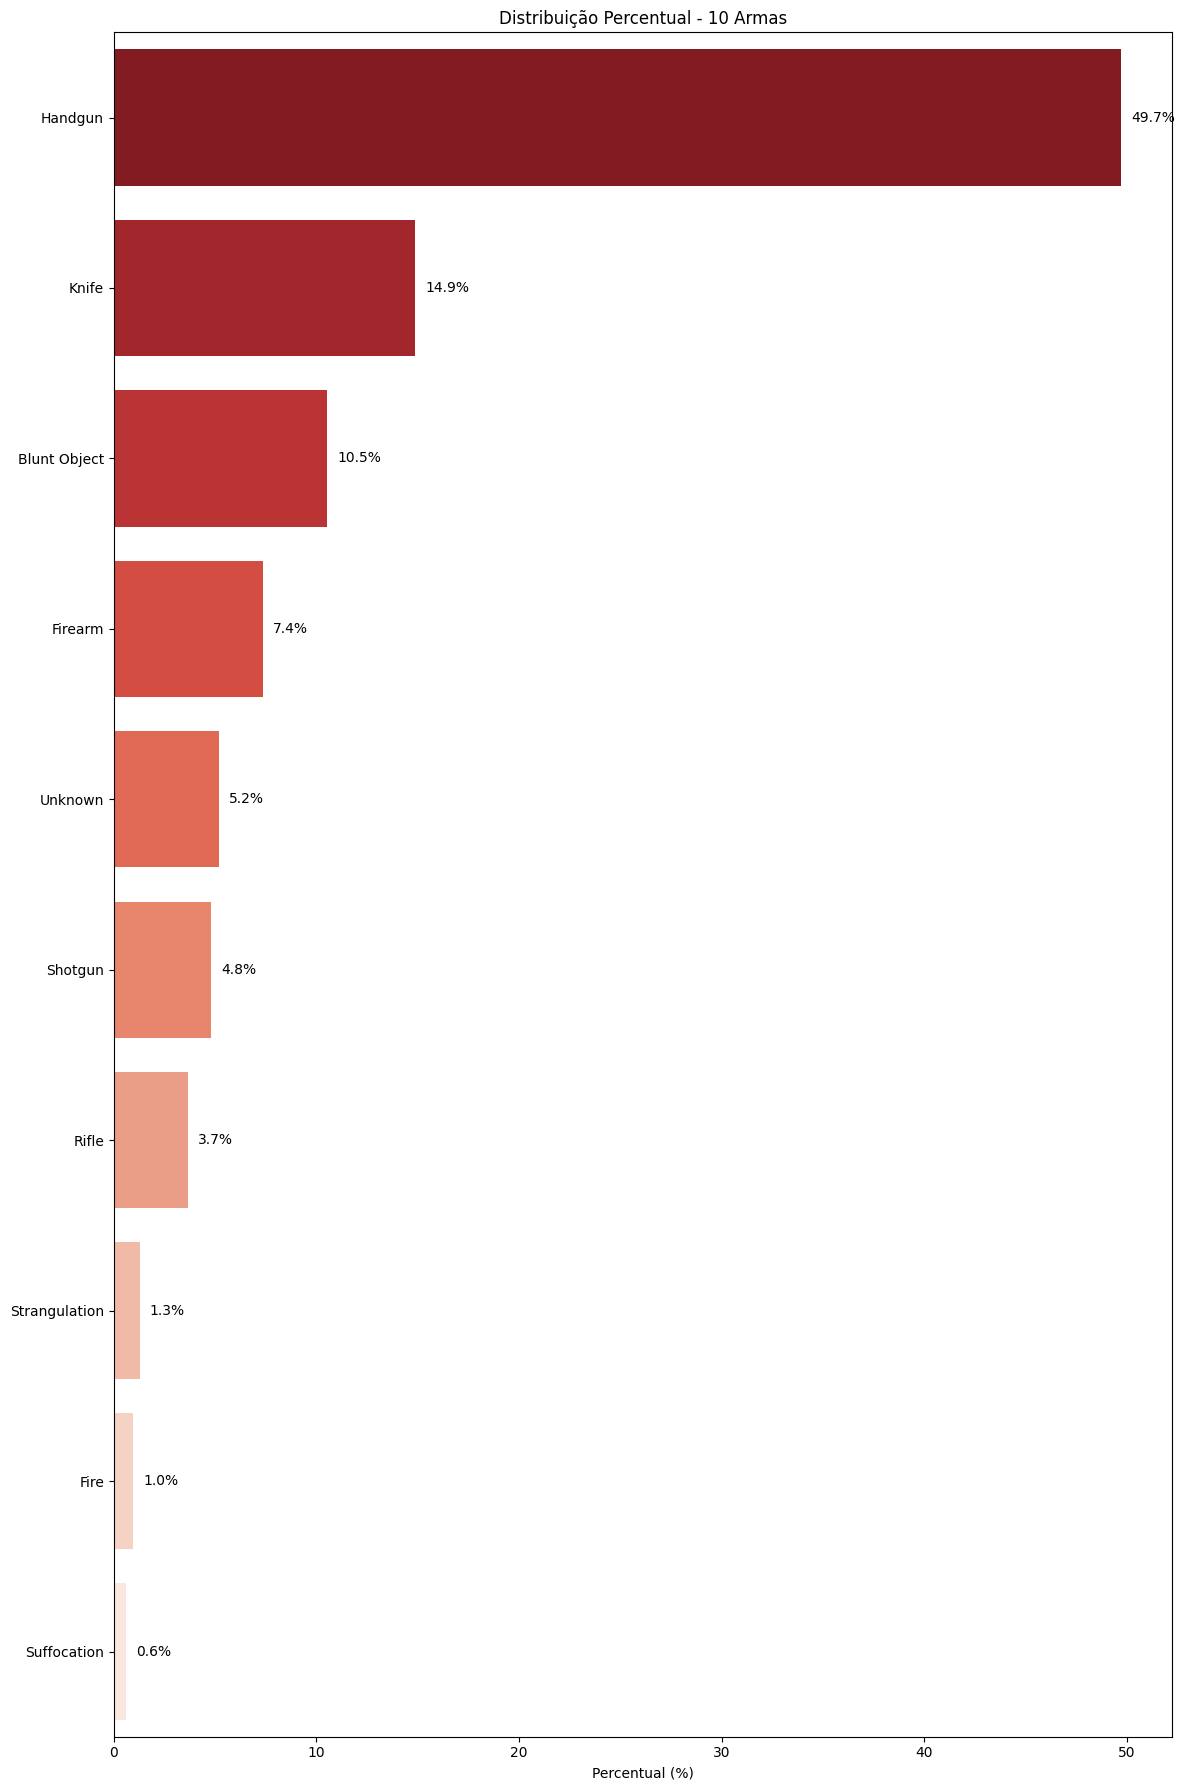

In [7]:
plt.figure(figsize=(12, 18))

ax = sns.barplot(
    x=pct_arm.values[:10],
    y=pct_arm.index[:10],
    orient='h',
    palette='Reds_r'
)

for i, v in enumerate(pct_arm.values[:10]):
    ax.text(
        v + 0.5,
        i,
        f'{v:.1f}%',
        va='center'
    )

ax.set_xlabel('Percentual (%)')
ax.set_ylabel('')
ax.set_title('Distribuição Percentual - 10 Armas')

plt.tight_layout()
plt.savefig('./image/distribuicao_armas.png', dpi=300)
plt.show()


<p>A análise das armas utilizadas revela o predomínio absoluto de meios letais de fogo, presentes em mais de 65% dos casos, com destaque para as <b>Handguns</b> (pistolas/revólveres), que sozinhas representam 49,72% do total. Em contrapartida, métodos que exigem proximidade física, como facas e objetos contundentes, somam cerca de 25% das ocorrências, enquanto meios que demandam planejamento ou recursos específicos, como venenos e explosivos, são extremamente raros (abaixo de 0,5%). Esses dados reforçam a forte correlação entre a alta letalidade dos crimes e o fácil acesso a armas de fogo de pequeno porte no período analisado.</p>

### Raça e Etnia das Vítimas ###

In [8]:
victims_race = df.groupby('Vitima_Raca')['Contagem_Vitimas'].sum().sort_values(ascending=False)
pct_victims_race = victims_race / df['Contagem_Vitimas'].sum() * 100

- **Vítimas acumuladas por raça**

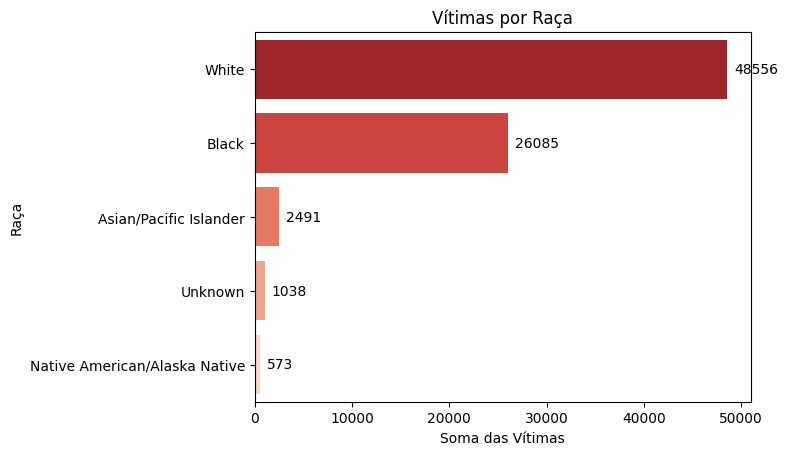

In [9]:
ax = sns.barplot(
    x=victims_race.values,
    y=victims_race.index,
    orient='h',
    palette='Reds_r'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=5)

ax.set_title('Vítimas por Raça')
ax.set_xlabel('Soma das Vítimas')
ax.set_ylabel('Raça')

plt.savefig('./image/soma_vitimas_raca.png', bbox_inches='tight', dpi=300)
plt.show()

- **Média das vítimas por raça**

In [10]:
mean_race_victim = df.groupby('Vitima_Raca')['Contagem_Vitimas'].mean().sort_values(ascending=False)
mean_race_victim

Vitima_Raca
Asian/Pacific Islander           0.251871
Unknown                          0.155482
White                            0.152970
Native American/Alaska Native    0.125465
Black                            0.086979
Name: Contagem_Vitimas, dtype: float64

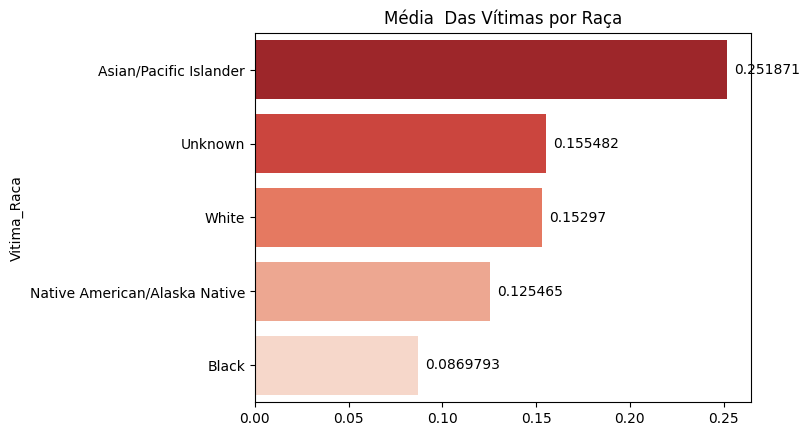

In [11]:
ax = sns.barplot(
    x=mean_race_victim.values,
    y=mean_race_victim.index,
    orient='h',
    palette='Reds_r'
)

for container in ax.containers:
    ax.bar_label(container, padding=5)

ax.set_title('Média  Das Vítimas por Raça')

plt.savefig('./image/media_vitimas_raca.png', bbox_inches='tight', dpi=300)
plt.show()

<h3>Conclusão</h3>
<p>
A análise estatística de tendência central (média) indicou que grupos populacionais racialmente minoritários, como asiáticos e nativos americanos, apresentam valores médios de contagem de vítimas mais elevados quando comparados aos dois maiores grupos raciais, brancos e negros. Contudo, esse resultado não implica causalidade nem deve ser interpretado como fator determinante, podendo refletir características específicas das ocorrências e do volume de registros.
</p>

- **Distribuição percentual**

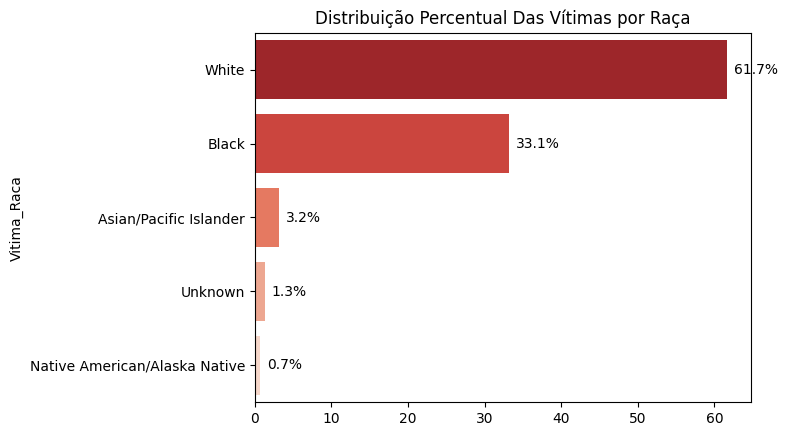

In [12]:
ax = sns.barplot(
    x=pct_victims_race.values,
    y=pct_victims_race.index,
    orient='h',
    palette='Reds_r'
)

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=5)

ax.set_title('Distribuição Percentual Das Vítimas por Raça')

plt.savefig('./image/distribuicao_raca_vitimas.png', bbox_inches='tight', dpi=300)
plt.show()

### Aplicando o Teste Estatístico de Análise de Variância (ANOVA): Contagem de Vítimas por Raça ###

- **Seleção dos grupes**

In [13]:
groups = [
    group['Contagem_Vitimas'].values
    for name, group in df.groupby('Vitima_Raca')
]
for i, g in enumerate(groups):
    print(f'Grupo {i} possui {len(g)} observações')

Grupo 0 possui 9890 observações
Grupo 1 possui 299899 observações
Grupo 2 possui 4567 observações
Grupo 3 possui 6676 observações
Grupo 4 possui 317422 observações


- **Resultado**

In [14]:

f_stat,p_value = f_oneway(*groups)

print('Resultado da ANOVA')
print(f'Estatística F: {f_stat:.2f}')
print(f'P-valor: {p_value:.4f}')

Resultado da ANOVA
Estatística F: 734.34
P-valor: 0.0000


<h3>Conclusão</h3>
<p>
A ANOVA indicou significância estatística (p &lt; 0,001), permitindo a rejeição da hipótese nula.
Contudo, o resultado não implica causalidade, indicando apenas diferenças estatísticas entre os grupos.
</p>


- ***Raça das Vítimas em ocorrências com autores identificados como brancos***

In [15]:
white = df[df['Perpetrador_Raca'] == 'White']
race_victim_white = white['Vitima_Raca'].value_counts(normalize=True) * 100
race_victim_white

Vitima_Raca
White                            90.348373
Black                             7.791315
Asian/Pacific Islander            0.782614
Unknown                           0.547097
Native American/Alaska Native     0.530601
Name: proportion, dtype: float64

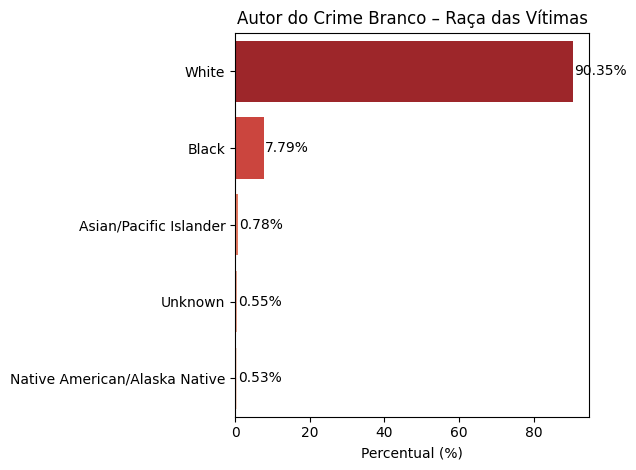

In [16]:
ax = sns.barplot(
    x=race_victim_white.values,
    y=race_victim_white.index,
    orient='h',
    palette='Reds_r'
)

for i, v in enumerate(race_victim_white.values):
    ax.text(
        v + 0.3,
        i,
        f'{v:.2f}%',
        va='center'
    )

ax.set_title('Autor do Crime Branco – Raça das Vítimas')
ax.set_xlabel('Percentual (%)')
ax.set_ylabel('')

plt.tight_layout()
plt.savefig('./image/autor_branco_crime.png', dpi=300)
plt.show()


- ***Raça das Vítimas em ocorrências com autores identificados como negro***

In [17]:
black = df[df['Perpetrador_Raca'] == 'Black']
race_victim_black = black['Vitima_Raca'].value_counts(normalize=True) * 100
race_victim_black

Vitima_Raca
Black                            83.563930
White                            15.213317
Asian/Pacific Islander            0.582241
Unknown                           0.448918
Native American/Alaska Native     0.191594
Name: proportion, dtype: float64

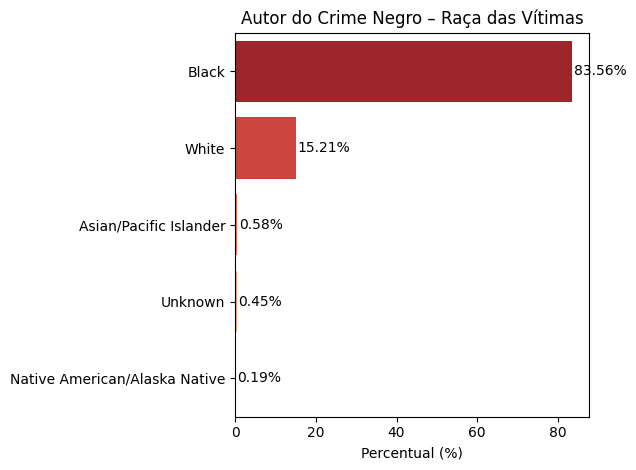

In [18]:
ax = sns.barplot(
    x=race_victim_black.values,
    y=race_victim_black.index,
    orient='h',
    palette='Reds_r'
)

for i, v in enumerate(race_victim_black.values):
    ax.text(
        v + 0.3,
        i,
        f'{v:.2f}%',
        va='center'
    )

ax.set_title('Autor do Crime Negro – Raça das Vítimas')
ax.set_xlabel('Percentual (%)')
ax.set_ylabel('')

plt.tight_layout()
plt.savefig('./image/autor_crime_negro.png', dpi=300)
plt.show()


<o> No grupo em que o autor é identificado como branco, a raça das vítimas é majoritariamente branca, indicando uma clara predominância de crimes intrarraciais. Da mesma forma, no grupo em que o autor é identificado como negro, observa-se que a maioria das vítimas também pertence à raça negra, confirmando o mesmo padrão de crimes intrarraciais em ambos os cenários. Em ambos os casos, a ocorrência de crimes interraciais aparece em menor proporção, reforçando que a violência tende a se concentrar dentro dos mesmos grupos demográficos. </p>

- **Sexo das vítimas**

Text(0.5, 0, 'Sexo das Vítimas')

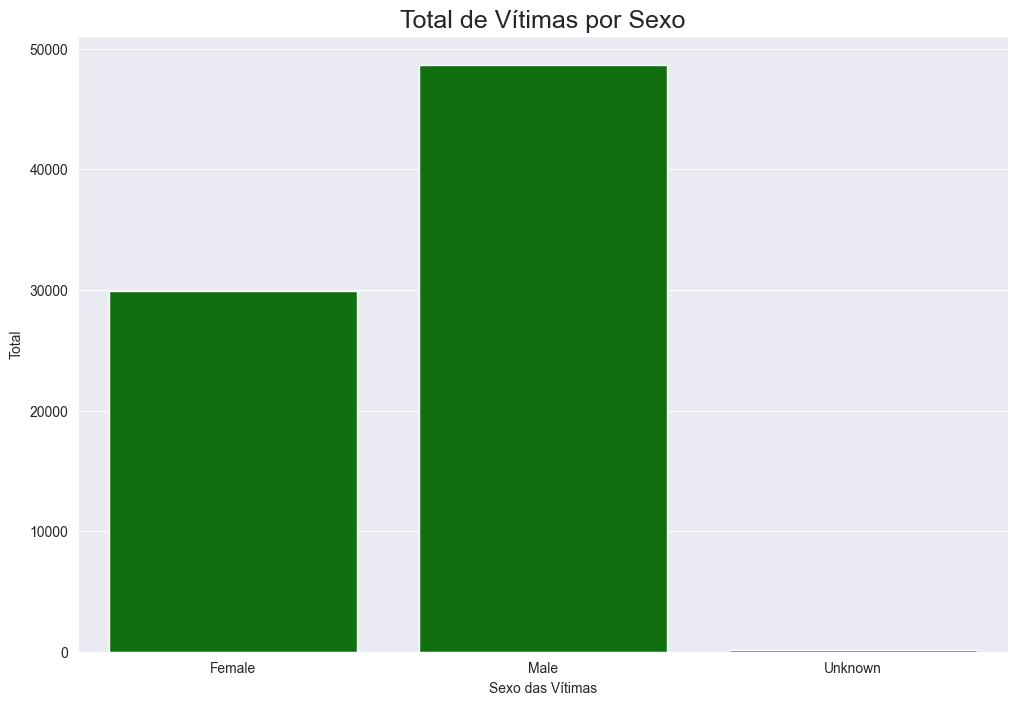

In [19]:
gender_sum = df.groupby('Vitima_Sexo')['Contagem_Vitimas'].sum()

plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
ax = sns.barplot(gender_sum, color='green')
ax.set_title('Total de Vítimas por Sexo', fontsize=18)
ax.set_ylabel('Total')
ax.set_xlabel('Sexo das Vítimas')


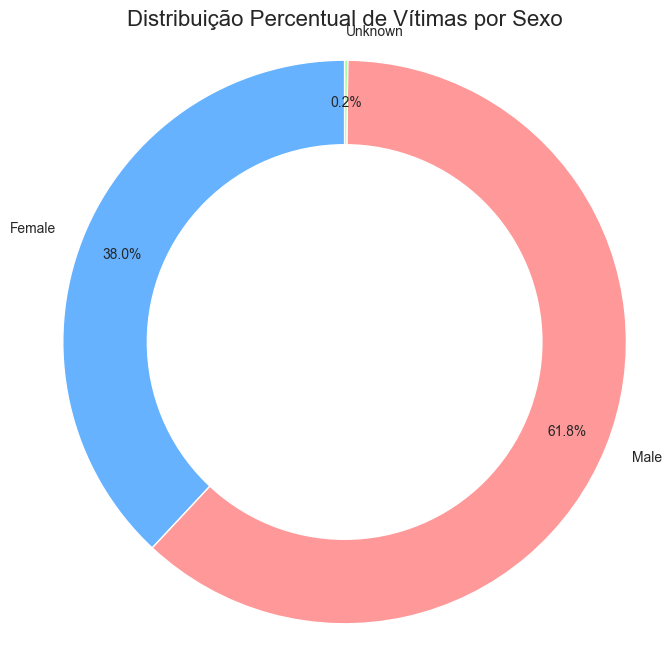

In [20]:
gender_pct = gender_sum / df.Contagem_Vitimas.sum() * 100

import matplotlib.pyplot as plt

labels = gender_pct.index.tolist()
sizes = gender_pct.values
colors = ['#66B2FF', '#FF9999', '#99FF99', '#FFCC99', '#C2C2F0']

plt.figure(figsize=(8, 8))

plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Distribuição Percentual de Vítimas por Sexo', fontsize=16)
plt.axis('equal')
plt.savefig('./image/distribuicao_sexo.png', dpi=300)
plt.show()

- **Idade das vítimas**

In [21]:

bins = [0, 18, 30, 40, df['Vitima_Idade'].max() + 1]
labels = ['1-18 (Jovem)', '19-30 (Adulto Jovem)', '31-40 (Adulto)', '40+ (Adulto Maduro)']

df['Faixa_Vitimas'] = pd.cut(
    df['Vitima_Idade'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)




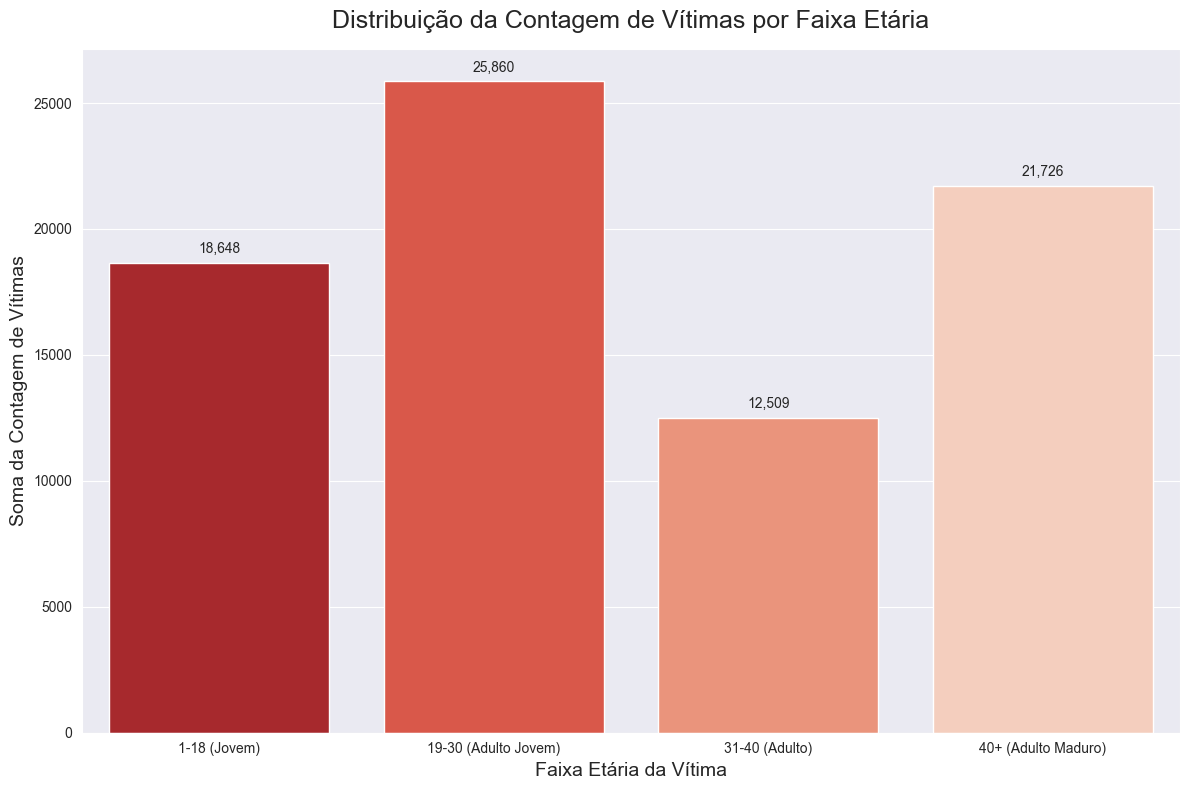

In [22]:

sns.set_style('darkgrid')
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=df,
    x='Faixa_Vitimas',
    y='Contagem_Vitimas',
    estimator=sum,
    ci=None,
    palette='Reds_r'
)

ax.set_title('Distribuição da Contagem de Vítimas por Faixa Etária', fontsize=18, pad=15)
ax.set_xlabel('Faixa Etária da Vítima', fontsize=14)
ax.set_ylabel('Soma da Contagem de Vítimas', fontsize=14)

plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.tight_layout()
plt.savefig('./image/distribuicao_faixa_etaria.png', dpi=300)
plt.show()

- **Tipo de crimes**

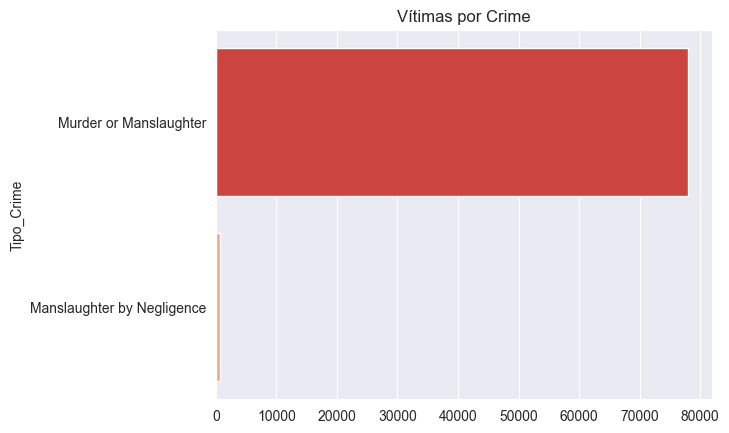

In [23]:
crime = df.groupby('Tipo_Crime')['Contagem_Vitimas'].sum().sort_values(ascending=False)

sns.set_style('darkgrid')
ax = sns.barplot(
    x=crime.values, 
    y=crime.index,
    palette='Reds_r'
)

ax.set_title('Vítimas por Crime')
plt.savefig('./image/contagem_vitimas_crime.png', dpi=300)

- ***As cidades mais violentas***

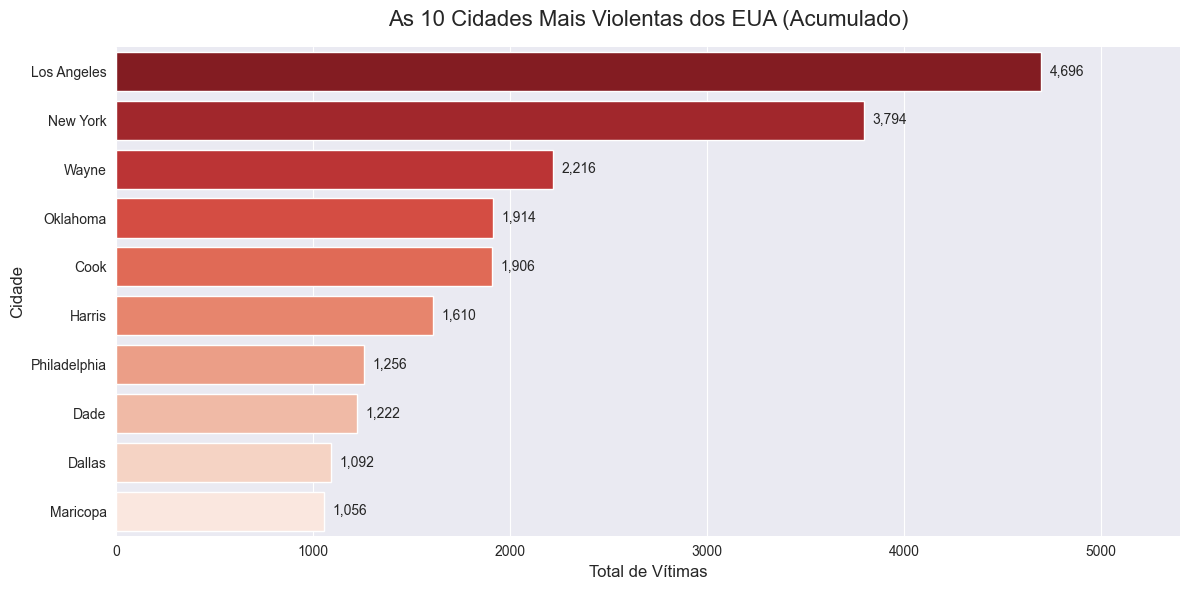

In [24]:


city_victim = (
    df.groupby('Cidade')['Contagem_Vitimas']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))

ax = sns.barplot(
    x=city_victim.values,
    y=city_victim.index,
    palette='Reds_r'
)

for container in ax.containers:
    ax.bar_label(
        container,
        fmt='{:,.0f}',
        padding=6,
        fontsize=10
    )

ax.set_xlim(0, city_victim.max() * 1.15)

ax.set_title('As 10 Cidades Mais Violentas dos EUA (Acumulado)', fontsize=16, pad=15)
ax.set_xlabel('Total de Vítimas', fontsize=12)
ax.set_ylabel('Cidade', fontsize=12)

sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.savefig('./image/top_10_cidades_mais_violentas.png', dpi=300)
plt.show()


***Regiões dos EUA***
---
| Região   | Cidades no Top 10 | Destaque                              |
|----------|------------------|----------------------------------------|
| Oeste    | 2                | Los Angeles (Líder)                    |
| Sul      | 4                | Maior número de cidades no ranking     |
| Nordeste | 2                | New York e Philadelphia                |
| Midwest  | 2                | Detroit e Chicago                      |


- ***Vítimas por unidade federativa***

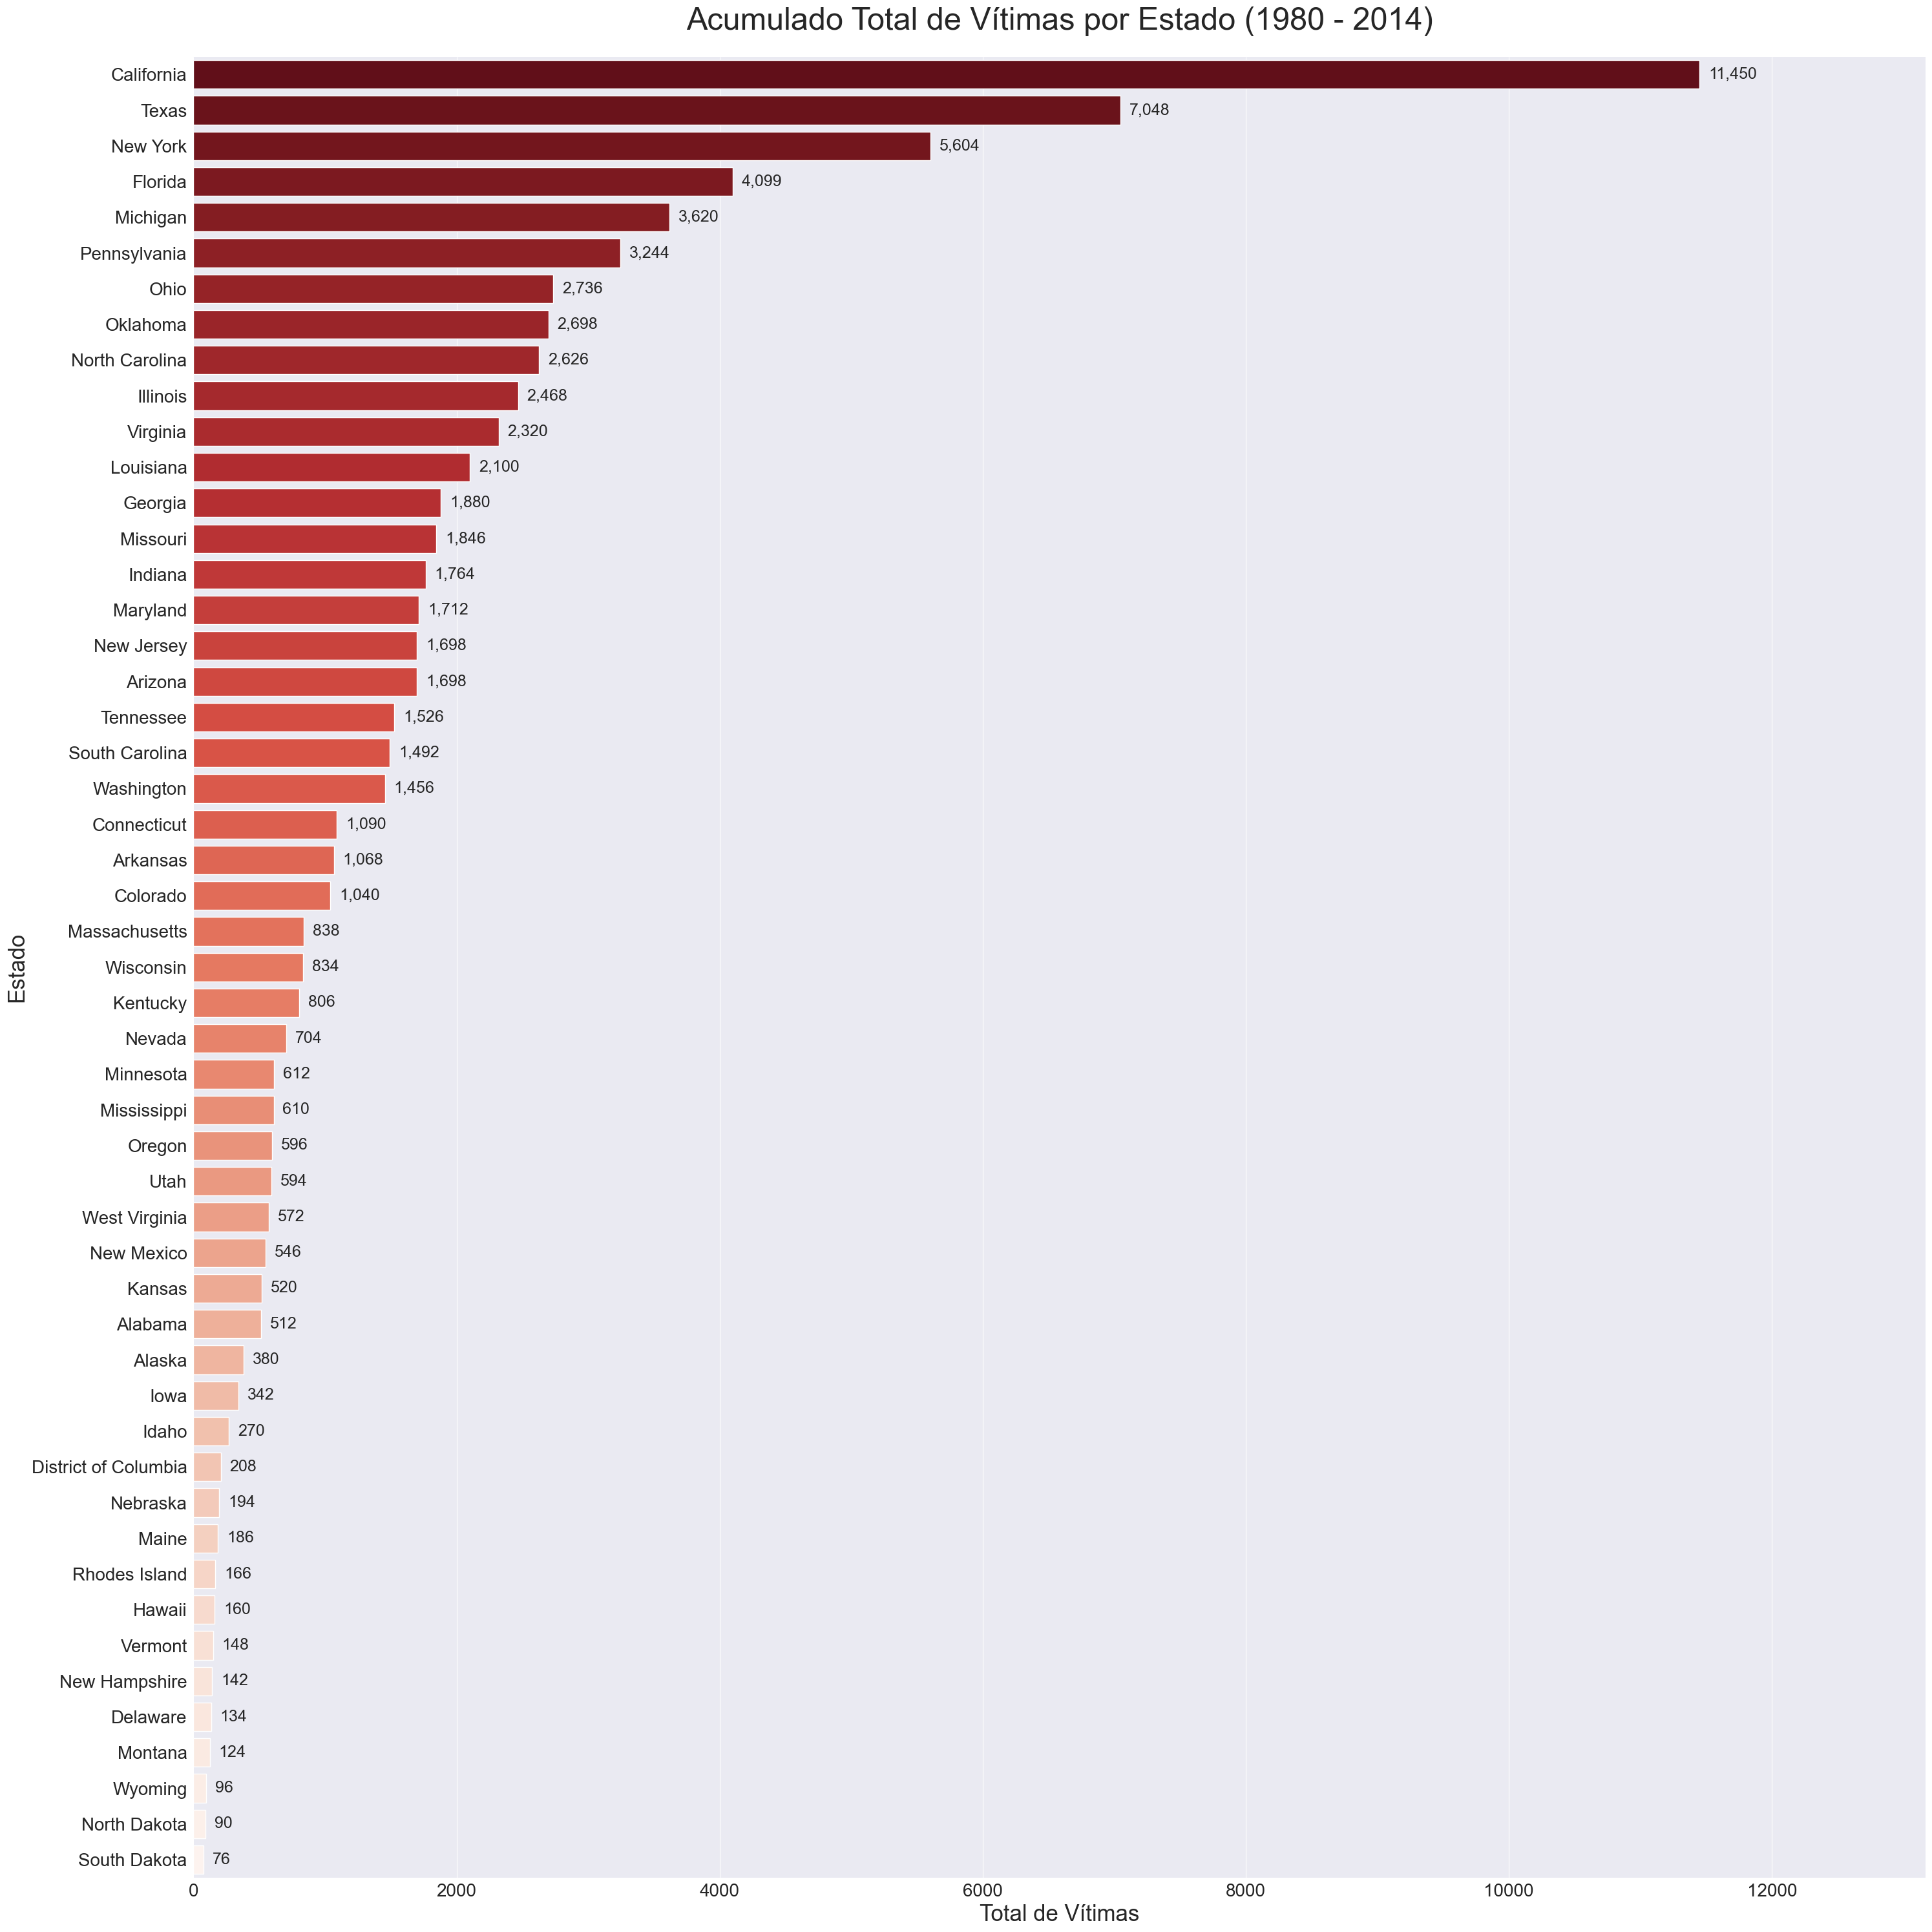

In [25]:

state_victim = df.groupby('Estado')['Contagem_Vitimas'].sum().sort_values(ascending=False)

sns.set_style('darkgrid')
plt.figure(figsize=(30, 30))

ax = sns.barplot(
    x=state_victim.values,
    y=state_victim.index,
    palette='Reds_r'
)

for container in ax.containers:
    ax.bar_label(
        container,
        fmt='{:,.0f}',
        padding=10,
        fontsize=18
    )

ax.set_xlim(0, state_victim.max() * 1.15)

ax.set_title('Acumulado Total de Vítimas por Estado (1980 - 2014)', fontsize=35, pad=30)
ax.set_xlabel('Total de Vítimas', fontsize=25)
ax.set_ylabel('Estado', fontsize=25)

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.savefig('./image/acumulado_vitimas_por_estado.png', dpi=300)
plt.show()

In [26]:
state_region = {
    "California": "West Coast",
    "Oregon": "West Coast",
    "Washington": "West Coast",

    "Texas": "South",
    "Florida": "South",
    "Georgia": "South",
    "Louisiana": "South",
    "Alabama": "South",
    "Mississippi": "South",
    "South Carolina": "South",
    "North Carolina": "South",
    "Tennessee": "South",
    "Arkansas": "South",
    "Oklahoma": "South",
    "Kentucky": "South",
    "West Virginia": "South",
    "Virginia": "South",
    "Maryland": "South",
    "Delaware": "South",

    "New York": "Northeast",
    "Pennsylvania": "Northeast",
    "New Jersey": "Northeast",
    "Massachusetts": "Northeast",
    "Connecticut": "Northeast",
    "Rhode Island": "Northeast",
    "New Hampshire": "Northeast",
    "Vermont": "Northeast",
    "Maine": "Northeast",

    "Illinois": "Midwest",
    "Ohio": "Midwest",
    "Michigan": "Midwest",
    "Indiana": "Midwest",
    "Wisconsin": "Midwest",
    "Minnesota": "Midwest",
    "Iowa": "Midwest",
    "Missouri": "Midwest",
    "Kansas": "Midwest",
    "Nebraska": "Midwest",
    "South Dakota": "Midwest",
    "North Dakota": "Midwest",

    "Arizona": "West",
    "Colorado": "West",
    "Utah": "West",
    "Nevada": "West",
    "New Mexico": "West",
    "Idaho": "West",
    "Montana": "West",
    "Wyoming": "West",
    "Alaska": "West",
    "Hawaii": "West",

    "District of Columbia": "South"
}


df['Regiao'] = df['Estado'].map(state_region)

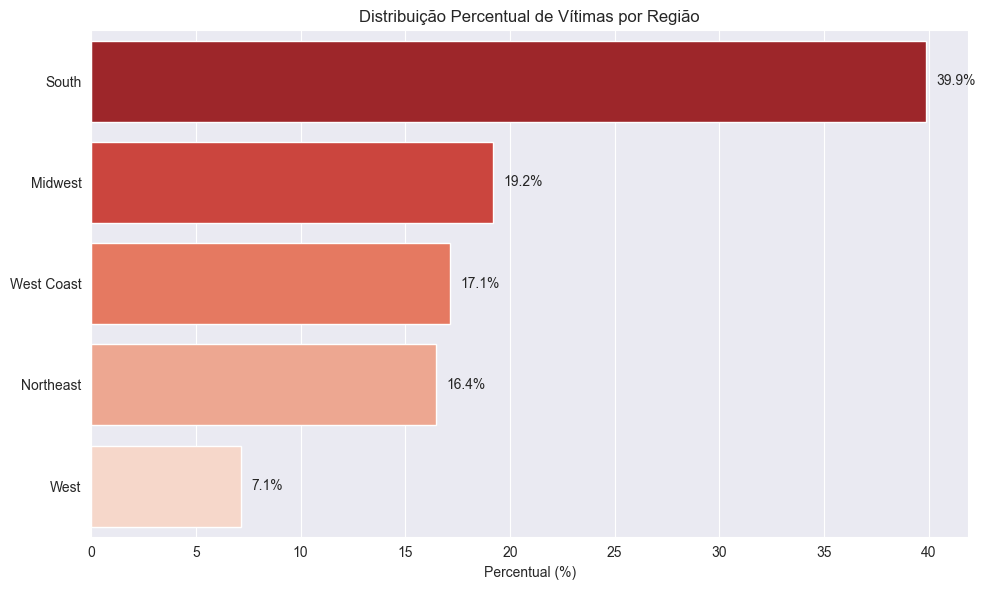

In [27]:
region_state = (
    df.groupby('Regiao')['Contagem_Vitimas'].sum()
    / df['Contagem_Vitimas'].sum()
) * 100
region_state = region_state.sort_values(ascending=False)

plt.figure(figsize=(10, 6))

ax = sns.barplot(
    x=region_state.values,
    y=region_state.index,
    orient='h',
    palette='Reds_r'
)

for i, v in enumerate(region_state.values):
    ax.text(v + 0.5, i, f'{v:.1f}%', va='center')

ax.set_title('Distribuição Percentual de Vítimas por Região')
ax.set_xlabel('Percentual (%)')
ax.set_ylabel('')

plt.tight_layout()
plt.savefig('./image/distribuicao_vitimas_regiao.png', dpi=300)
plt.show()


- Vítimas ao longo do tempo

<h2>Conclusão da Análise Dos Estados, Cidades e Região</h2>

<p>
    A análise geográfica revela uma concentração crítica de ocorrências na região Sul dos Estados Unidos, que responde por aproximadamente 40% das vítimas no período analisado. No nível estadual, observa-se que estados com grandes densidades populacionais e centros urbanos complexos, como Califórnia, Texas e New York, lideram o volume total de casos. No entanto, a disparidade entre o Sul e as demais regiões (como o Oeste, com apenas 7,1%) sugere que fatores regionais específicos — socioeconômicos ou legislativos — exercem influência direta na distribuição da violência, indo além do simples tamanho da população.
</p>

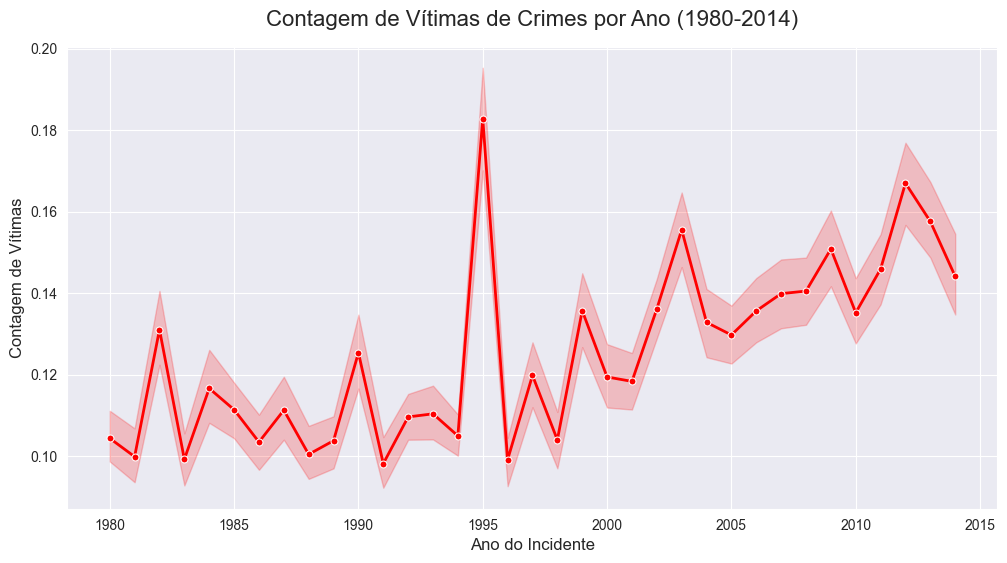

In [28]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=df, x='Ano', y='Contagem_Vitimas', color='red', lw=2, marker='o', markersize=5)

ax.set_title('Contagem de Vítimas de Crimes por Ano (1980-2014)', fontsize=16, pad=15)
ax.set_xlabel('Ano do Incidente', fontsize=12)
ax.set_ylabel('Contagem de Vítimas', fontsize=12)

plt.savefig('./image/contagem_vitimas_ano.png', dpi=300)
plt.show()

- ***Análise temporal: exceto cidades mais violentas dos EUA***

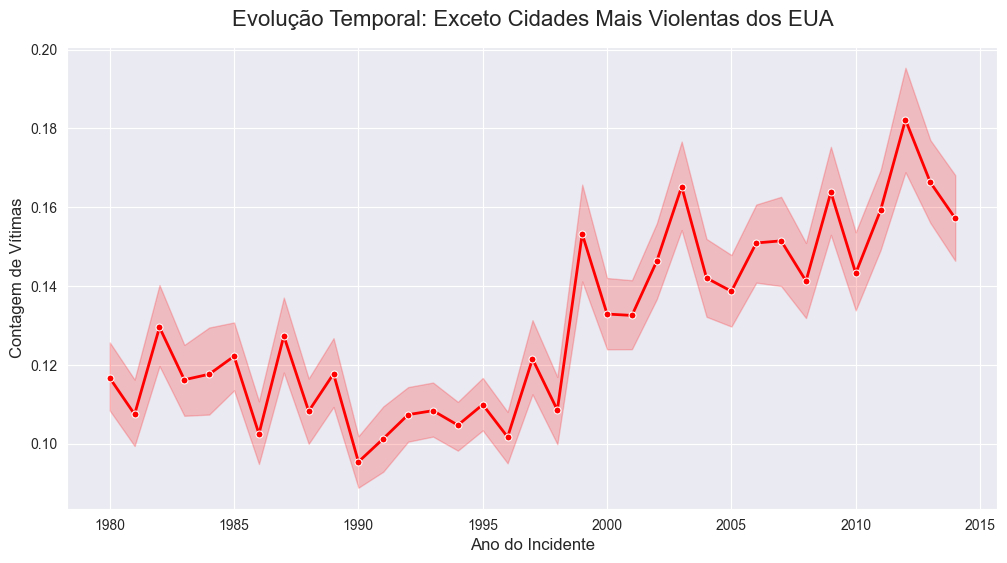

In [29]:
data_exclud_city = df[~df['Cidade'].isin(city_victim.index)]

sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=data_exclud_city, x='Ano', y='Contagem_Vitimas', color='red', lw=2, marker='o', markersize=5)

ax.set_title('Evolução Temporal: Exceto Cidades Mais Violentas dos EUA', fontsize=16, pad=15)
ax.set_xlabel('Ano do Incidente', fontsize=12)
ax.set_ylabel('Contagem de Vítimas', fontsize=12)

plt.savefig('./image/linha_tempo_sem_cidades_violentas_eua.png', dpi=300)
plt.show()

- **Classificando as decadas**

In [30]:
bins = [1980, 1990, 2000, 2010, 2020]
labels = ['Década de 80', 'Década de 90', 'Anos 2000', 'Década de 2010']
df['Decada'] =  pd.cut(df['Ano'], bins=bins, labels=labels, right=False)

In [31]:
size_mean = df.groupby('Decada')['Contagem_Vitimas'].mean()
size_sum = df.groupby('Decada')['Contagem_Vitimas'].sum()



- **Média**

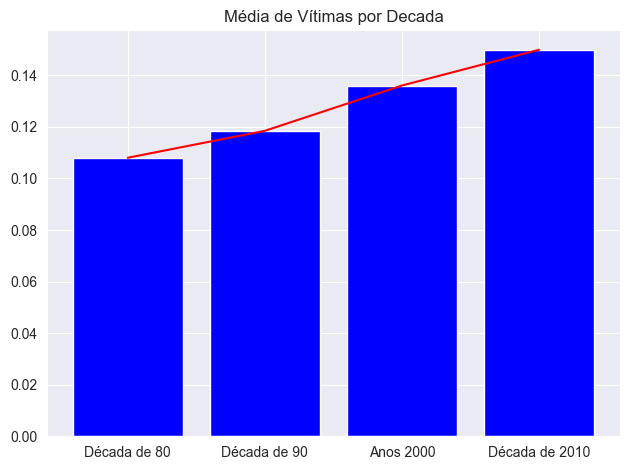

In [52]:
plt.Figure(figsize=(18,12))
plt.plot(size_mean.index, size_mean.values, color='red')
plt.bar(size_mean.index, size_mean.values, color='blue')
plt.title('Média de Vítimas por Decada')
plt.tight_layout()
plt.savefig('./image/media_decada.png')
plt.show()

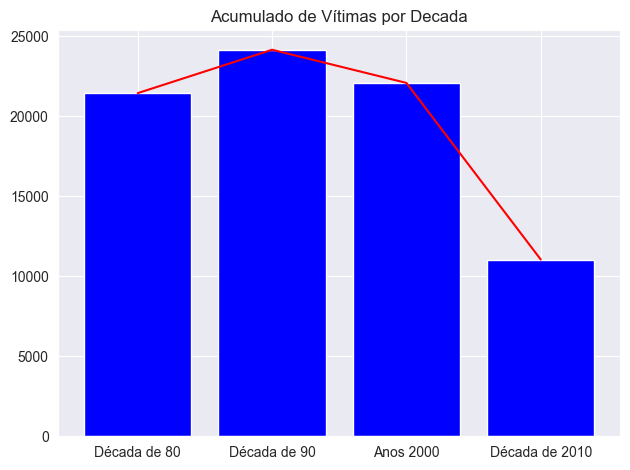

In [34]:
plt.Figure(figsize=(18,12))
plt.plot(size_sum.index, size_sum.values, color='red')
plt.bar(size_sum.index, size_sum.values, color='blue')
plt.title('Acumulado de Vítimas por Decada')
plt.tight_layout()
plt.savefig('./image/acumulado_decada.png')
plt.show()

### Conclusão: ###
> A exclusão das cidades mais violentas revela que a criminalidade nos EUA não está diminuindo de forma uniforme. Enquanto os picos históricos das grandes metrópoles (como o de 1995) foram atenuados, observa-se um crescimento persistente e uma tendência de alta no restante do país a partir de 2000, atingindo seu nível máximo em 2012.